# GMM - Based Image Segmentation

Processing K = 1...


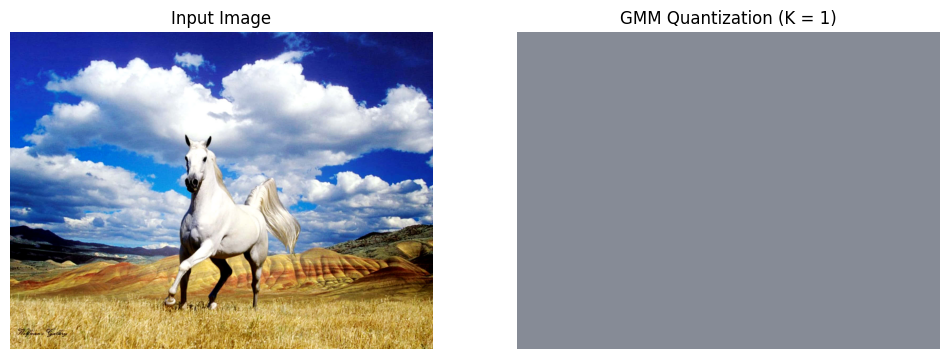

Processing K = 2...


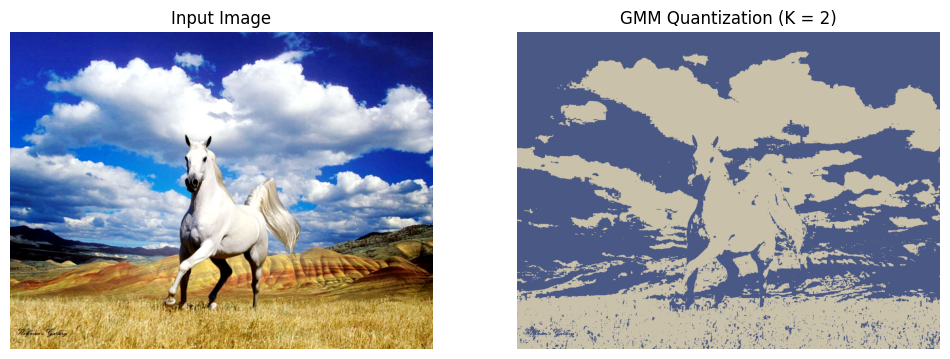

Processing K = 3...


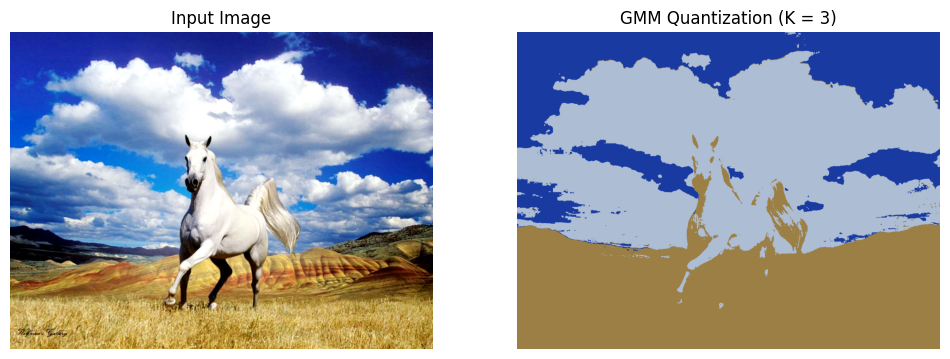

All segmentations complete.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the common GMM convergence warning for cleaner output
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# --- Configuration & Load ---
path = "/content/horse.jpg"
# Process for K=1, 2, and 3 components
K_COMPONENTS = range(1, 4)
TOLERANCE = 1e-10

# Load and prepare image
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
pixels = img.reshape(-1, 3) # (N_pixels, 3_color_channels)

# --- GMM Segmentation Loop ---
for k in K_COMPONENTS:
    print(f"Processing K = {k}...")

    # 1. Fit GMM
    gmm = GaussianMixture(n_components=k, tol=TOLERANCE, random_state=0, init_params='kmeans')
    gmm.fit(pixels)

    # 2. Segment (Quantize Colors)
    # Predict labels, use means to get segmented pixel values, and reshape back
    segmented = gmm.means_[gmm.predict(pixels)].reshape(img.shape).astype(np.uint8)

    # 3. Plotting (Combined Figure)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(img)
    axes[0].set_title("Input Image")
    axes[0].axis('off')

    axes[1].imshow(segmented)
    axes[1].set_title(f"GMM Quantization (K = {k})")
    axes[1].axis('off')

    plt.show()

print("All segmentations complete.")